# Datenanalyse 
Der kombinierte Datensatz fertig.csv soll analysiert werden 
Ziel ist es zu überprüfen ob sich spannende Informationen ergeben


In [52]:
import pandas as pd

file_path1 = "fertig.csv"
from pathlib import Path
import matplotlib.pyplot as plt
# Pfad zum Wurzelordner mit allen Bildern
ROOT_DIR = Path("/Users/davidassmann/Desktop/GuI/Objektbilder")   # <- anpassen!

# Dateiendungen, die gezählt werden sollen
IMG_EXTS = {".jpg", ".jpeg", ".png", ".tif", ".tiff"}

Matplotlib is building the font cache; this may take a moment.


In [44]:
# Erstmal mit Latin1 (ISO-8859-1), oft Standard bei Windows/Excel
df = pd.read_csv(file_path1, encoding="latin1", sep=",")

In [45]:
print(df)

      0   1   2   3              4  \
0   NaN NaN NaN NaN  1-2024-0061 0   
1   NaN NaN NaN NaN  1-2024-0062 0   
2   NaN NaN NaN NaN  1-2024-0063 0   
3   NaN NaN NaN NaN  1-2024-0064 0   
4   NaN NaN NaN NaN  1-2024-0065 0   
..   ..  ..  ..  ..            ...   
96  NaN NaN NaN NaN  1-2025-0523 0   
97  NaN NaN NaN NaN  1-2025-0524 0   
98  NaN NaN NaN NaN  1-2025-0603 0   
99  NaN NaN NaN NaN  1-2025-0759 0   
100 NaN NaN NaN NaN  1-2025-0767 0   

                                                     5   6   7   8   9  ...  \
0                              RFT Fernmeldewerk (VEB) NaN NaN NaN NaN  ...   
1                              RFT Fernmeldewerk (VEB) NaN NaN NaN NaN  ...   
2                       Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ...   
3                       Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ...   
4                       Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ...   
..                                                 ...  ..  ..  ..  .

In [46]:
print(df.shape)       # Zeilen, Spalten
print(df.columns)     # alle Spaltennamen


(101, 84)
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')


In [47]:
# Spalte 4 (E) bereinigen und im DataFrame überschreiben
df.iloc[:, 4] = (
    df.iloc[:, 4]
    .astype(str)              # sicherstellen, dass es Strings sind
    .str.strip()              # Leerzeichen vorne/hinten weg
    .str.replace(r"\s+0+$", "", regex=True)   # " 0" am Ende entfernen
)

# Kontrolle
print(df.head(10))


    0   1   2   3            4  \
0 NaN NaN NaN NaN  1-2024-0061   
1 NaN NaN NaN NaN  1-2024-0062   
2 NaN NaN NaN NaN  1-2024-0063   
3 NaN NaN NaN NaN  1-2024-0064   
4 NaN NaN NaN NaN  1-2024-0065   
5 NaN NaN NaN NaN  1-2024-0066   
6 NaN NaN NaN NaN  1-2024-0070   
7 NaN NaN NaN NaN  1-2024-0071   
8 NaN NaN NaN NaN  1-2024-0072   
9 NaN NaN NaN NaN  1-2024-0073   

                                                   5   6   7   8   9  ...  74  \
0                            RFT Fernmeldewerk (VEB) NaN NaN NaN NaN  ... NaN   
1                            RFT Fernmeldewerk (VEB) NaN NaN NaN NaN  ... NaN   
2                     Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ... NaN   
3                     Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ... NaN   
4                     Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ... NaN   
5                     Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ... NaN   
6  Philips - Koninklijke Philips N. V.\nMuharrem ... NaN N

In [48]:
# Hilfsfunktion: wie viele Bilder gibt es zu einer Objektnummer?
def count_images_for_number(number: str, root: Path) -> int:
    number = str(number).strip()
    if not number or number.lower() == "nan":
        return 0

    hits = []
    for p in root.rglob("*"):
        if p.is_file() and p.suffix.lower() in IMG_EXTS:
            if p.stem.startswith(number):  # stem = Dateiname ohne Endung
                hits.append(p)
    return len(hits)


# Neue Spalte "image_count" anlegen (Spalte 4 = E)
df["image_count"] = df.iloc[:, 4].apply(lambda num: count_images_for_number(num, ROOT_DIR))

# Kontrolle
print(df[["image_count"]].head())

   image_count
0            7
1            6
2            7
3            6
4            6


In [51]:
print(df)

      0   1   2   3            4  \
0   NaN NaN NaN NaN  1-2024-0061   
1   NaN NaN NaN NaN  1-2024-0062   
2   NaN NaN NaN NaN  1-2024-0063   
3   NaN NaN NaN NaN  1-2024-0064   
4   NaN NaN NaN NaN  1-2024-0065   
..   ..  ..  ..  ..          ...   
96  NaN NaN NaN NaN  1-2025-0523   
97  NaN NaN NaN NaN  1-2025-0524   
98  NaN NaN NaN NaN  1-2025-0603   
99  NaN NaN NaN NaN  1-2025-0759   
100 NaN NaN NaN NaN  1-2025-0767   

                                                     5   6   7   8   9  ...  \
0                              RFT Fernmeldewerk (VEB) NaN NaN NaN NaN  ...   
1                              RFT Fernmeldewerk (VEB) NaN NaN NaN NaN  ...   
2                       Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ...   
3                       Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ...   
4                       Siemens & Halske AG\nunbekannt NaN NaN NaN NaN  ...   
..                                                 ...  ..  ..  ..  ..  ...   
96            

Minimale Anzahl Bilder: 0
Maximale Anzahl Bilder: 13
Durchschnittliche Anzahl Bilder: 4.267326732673268
Median: 4.0


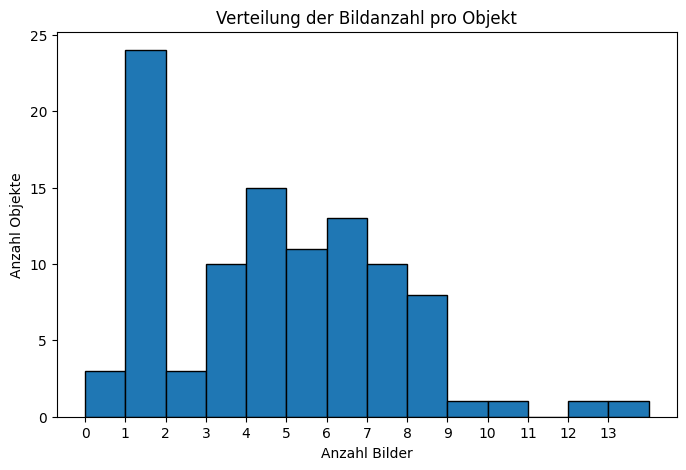

In [53]:
# Basisstatistiken für die Spalte 'image_count'
print("Minimale Anzahl Bilder:", df["image_count"].min())
print("Maximale Anzahl Bilder:", df["image_count"].max())
print("Durchschnittliche Anzahl Bilder:", df["image_count"].mean())
print("Median:", df["image_count"].median())

# Histogramm
plt.figure(figsize=(8,5))
plt.hist(df["image_count"], bins=range(0, df["image_count"].max()+2), edgecolor="black")
plt.title("Verteilung der Bildanzahl pro Objekt")
plt.xlabel("Anzahl Bilder")
plt.ylabel("Anzahl Objekte")
plt.xticks(range(0, df["image_count"].max()+1))
plt.show()

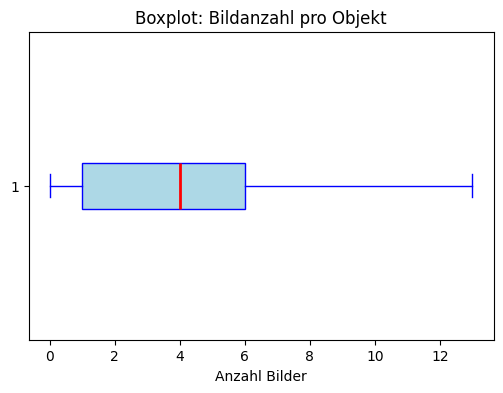

In [54]:
# --- Boxplot ---
plt.figure(figsize=(6,4))
plt.boxplot(df["image_count"], vert=False, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red", linewidth=2),
            whiskerprops=dict(color="blue"),
            capprops=dict(color="blue"),
            flierprops=dict(marker="o", markerfacecolor="orange", markersize=6, linestyle="none"))
plt.title("Boxplot: Bildanzahl pro Objekt")
plt.xlabel("Anzahl Bilder")
plt.show()